<a href="https://colab.research.google.com/github/gauravvxv/QuickBite-Express-Crisis-Recovery/blob/main/Notebook/QuickBite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QuickBite Express Crisis Recovery**


## **Business Problem**

QuickBite Express is a Bengaluru-based food-tech startup (founded in 2020) that connects customers with nearby restaurants and cloud kitchens. In June 2025, QuickBite faced a major crisis. A viral social media incident involving food safety violations at partner restaurants, combined with a week-long delivery outage during the monsoon season, triggered massive customer backlash. Competitors capitalized with aggressive campaigns, worsening the situation.

The challenges were severe:

* A large portion of active users disengaged within a short period.
* Daily orders saw a sharp decline compared to earlier months.
* Customer satisfaction scores fell sharply, signaling trust issues.
* Many partner restaurants shifted to competing platforms.
* Customer acquisition costs rose significantly.

## **Import Libraries**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load CSV file**

In [101]:
customers = pd.read_csv('/content/drive/MyDrive/RPC_18_Datasets/dim_customer.csv')
d_partner = pd.read_csv('/content/drive/MyDrive/RPC_18_Datasets/dim_delivery_partner_.csv')
menu = pd.read_csv('/content/drive/MyDrive/RPC_18_Datasets/dim_menu_item.csv')
restaurants = pd.read_csv('/content/drive/MyDrive/RPC_18_Datasets/dim_restaurant.csv')
d_performance = pd.read_csv('/content/drive/MyDrive/RPC_18_Datasets/fact_delivery_performance.csv')
order_items = pd.read_csv('/content/drive/MyDrive/RPC_18_Datasets/fact_order_items.csv')
orders = pd.read_csv('/content/drive/MyDrive/RPC_18_Datasets/fact_orders.csv')
rating = pd.read_csv('/content/drive/MyDrive/RPC_18_Datasets/fact_ratings.csv')

## **All DataFrame into one Dictionary**

In [102]:
datasets = {
    'customers': customers,
    'delivery_partner': d_partner,
    'menu': menu,
    'restaurants': restaurants,
    'delivery_performance': d_performance,
    'order_items': order_items,
    'orders': orders,
    'rating': rating
}

In [103]:
summary = []

for name, df in datasets.items():
    row = {
        'Dataset': name,
        'Rows': df.shape[0],
        'Columns': df.shape[1],
        'Total missing values': df.isnull().sum().sum(),
        'Total duplicate rows': df.duplicated().sum()
    }
    summary.append(row)

summary_df = pd.DataFrame(summary)

summary_df

,Dataset,Rows,Columns,Total missing values,Total duplicate rows
0,customers,107776,4,0,0
1,delivery_partner,15000,7,0,0
2,menu,342671,6,0,0
3,restaurants,19995,7,0,0
4,delivery_performance,149166,4,0,0
5,order_items,342994,8,0,0
6,orders,149166,11,5635,0
7,rating,68842,7,119,16


In [104]:
for name, df in datasets.items():
    print(f"Null values in dataset: {name}")
    null_counts = df.isnull().sum()
    null_cols = null_counts[null_counts > 0]

    if null_cols.empty:
        print("No null values found.")
    else:
        print(null_cols)

    print("\n")

Null values in dataset: customers
No null values found.


Null values in dataset: delivery_partner
No null values found.


Null values in dataset: menu
No null values found.


Null values in dataset: restaurants
No null values found.


Null values in dataset: delivery_performance
No null values found.


Null values in dataset: order_items
No null values found.


Null values in dataset: orders
delivery_partner_id    5635
dtype: int64


Null values in dataset: rating
order_id            17
customer_id         17
restaurant_id       17
rating              17
review_text         17
review_timestamp    17
sentiment_score     17
dtype: int64




In [105]:
rating.dropna(inplace=True)

In [106]:
customers.head()

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic


In [107]:
orders.head()

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N


In [108]:
order_items.head()

,order_id,item_id,menu_item_id,restaurant_id,quantity,unit_price,item_discount,line_total
0,ORD202501006518,ITEM001,MENU12962_3216,REST12962,2,48.31,0.00,96.62
1,ORD202501006518,ITEM002,MENU12962_1962,REST12962,3,61.24,0.00,183.71
2,ORD202501019281,ITEM001,MENU14069_0510,REST14069,2,87.19,0.00,174.38
3,ORD202501019281,ITEM002,MENU14069_4308,REST14069,3,84.67,0.00,254.00
4,ORD202501023439,ITEM001,MENU08622_7574,REST08622,2,235.81,35.44,436.18


In [109]:
d_partner.head()

,delivery_partner_id,partner_name,city,vehicle_type,employment_type,avg_rating,is_active
0,DP09615,Neha E,Bengaluru,Scooter,Full-time,3.77,Y
1,DP02021,Neha V,Bengaluru,Bike,Full-time,3.90,Y
2,DP05541,Vikas S,Delhi,Cycle,Part-time,3.33,Y
3,DP13859,Amit B,Delhi,Cycle,Part-time,4.07,N
4,DP08091,Arjun R,Mumbai,Car,Full-time,4.63,Y


In [110]:
menu.head()

,menu_item_id,restaurant_id,item_name,category,is_veg,price
0,MENU12962_3216,REST12962,Paneer Tikka Pizza,Pizza,Y,271.05
1,MENU12962_1962,REST12962,Pepperoni Pizza,Pizza,N,327.26
2,MENU14069_0510,REST14069,Egg Fried Rice,Fried Rice,N,200.01
3,MENU14069_4308,REST14069,Paneer Tikka,Starters,Y,198.83
4,MENU08622_7574,REST08622,Kadai Paneer,Curries,Y,271.60


In [111]:
restaurants.head()

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y


In [112]:
d_performance.head()

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,31,31,6.4
1,ORD202501012051,46,42,1.9
2,ORD202501019281,25,31,6.2
3,ORD202501000124,29,41,6.2
4,ORD202501006518,37,41,2.4


In [113]:
rating.head()

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70


## **Feature Engineering**

In [114]:
orders['order_month'] = pd.to_datetime(orders['order_timestamp']).dt.month

In [115]:
orders['crisis_phase']  = orders['order_timestamp'].apply(lambda x: 'Pre-Crisis' if x < '2025-06-01' else 'Crisis' if x <= '2025-06-30' else 'Recovery')

## **Exploratory Data Analysis (EDA)**

In [116]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107776 entries, 0 to 107775
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   customer_id          107776 non-null  object
 1   signup_date          107776 non-null  object
 2   city                 107776 non-null  object
 3   acquisition_channel  107776 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


In [117]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             149166 non-null  object 
 1   customer_id          149166 non-null  object 
 2   restaurant_id        149166 non-null  object 
 3   delivery_partner_id  143531 non-null  object 
 4   order_timestamp      149166 non-null  object 
 5   subtotal_amount      149166 non-null  float64
 6   discount_amount      149166 non-null  float64
 7   delivery_fee         149166 non-null  float64
 8   total_amount         149166 non-null  float64
 9   is_cod               149166 non-null  object 
 10  is_cancelled         149166 non-null  object 
 11  order_month          149166 non-null  int32  
 12  crisis_phase         149166 non-null  object 
dtypes: float64(4), int32(1), object(8)
memory usage: 14.2+ MB


In [118]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342994 entries, 0 to 342993
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       342994 non-null  object 
 1   item_id        342994 non-null  object 
 2   menu_item_id   342994 non-null  object 
 3   restaurant_id  342994 non-null  object 
 4   quantity       342994 non-null  int64  
 5   unit_price     342994 non-null  float64
 6   item_discount  342994 non-null  float64
 7   line_total     342994 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 20.9+ MB


In [119]:
d_partner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_partner_id  15000 non-null  object 
 1   partner_name         15000 non-null  object 
 2   city                 15000 non-null  object 
 3   vehicle_type         15000 non-null  object 
 4   employment_type      15000 non-null  object 
 5   avg_rating           15000 non-null  float64
 6   is_active            15000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 820.4+ KB


In [120]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342671 entries, 0 to 342670
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   menu_item_id   342671 non-null  object 
 1   restaurant_id  342671 non-null  object 
 2   item_name      342671 non-null  object 
 3   category       342671 non-null  object 
 4   is_veg         342671 non-null  object 
 5   price          342671 non-null  float64
dtypes: float64(1), object(5)
memory usage: 15.7+ MB


In [121]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   restaurant_id      19995 non-null  object
 1   restaurant_name    19995 non-null  object
 2   city               19995 non-null  object
 3   cuisine_type       19995 non-null  object
 4   partner_type       19995 non-null  object
 5   avg_prep_time_min  19995 non-null  object
 6   is_active          19995 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [122]:
d_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_id                     149166 non-null  object 
 1   actual_delivery_time_mins    149166 non-null  int64  
 2   expected_delivery_time_mins  149166 non-null  int64  
 3   distance_km                  149166 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.6+ MB


In [123]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68825 entries, 0 to 68829
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          68825 non-null  object 
 1   customer_id       68825 non-null  object 
 2   restaurant_id     68825 non-null  object 
 3   rating            68825 non-null  float64
 4   review_text       68825 non-null  object 
 5   review_timestamp  68825 non-null  object 
 6   sentiment_score   68825 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.2+ MB


In [124]:
orders.describe()

,subtotal_amount,discount_amount,delivery_fee,total_amount,order_month
count,149166.000000,149166.000000,149166.000000,149166.000000,149166.000000
mean,314.373203,18.891589,30.069224,325.550833,4.039064
std,147.346779,29.801279,10.997816,146.790190,2.343466
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,234.960000,0.000000,24.730000,249.842500,2.000000
50%,309.070000,0.000000,31.485000,321.700000,4.000000
75%,396.290000,34.690000,38.240000,406.590000,5.000000
max,900.000000,222.530000,45.000000,944.910000,9.000000


In [125]:
d_performance.describe()

,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
count,149166.000000,149166.000000,149166.000000
mean,44.404549,38.691679,4.494667
std,12.784224,5.074100,2.021213
min,25.000000,30.000000,1.000000
25%,36.000000,35.000000,2.700000
50%,42.000000,39.000000,4.500000
75%,50.000000,43.000000,6.200000
max,90.000000,50.000000,8.000000


In [127]:
order_trend = orders.groupby('order_month')['order_id'].count().reset_index()

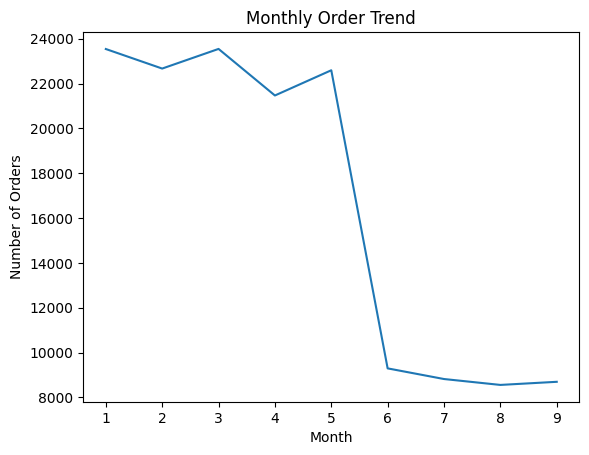

In [128]:
sns.lineplot(data=order_trend, x='order_month', y='order_id')
plt.title('Monthly Order Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

<Axes: xlabel='rating', ylabel='Count'>

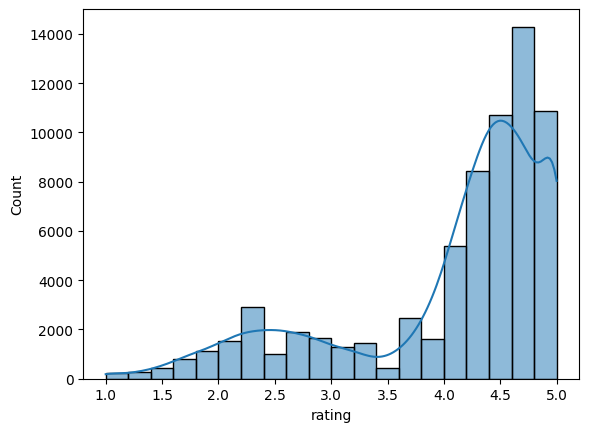

In [129]:
sns.histplot(data = rating ,x = 'rating',bins = 20, kde=True)